In [1]:
!pip install -U scikit-learn


     |████████████████████████████████| 7.2 MB 918 kB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#LDA
from sklearn.neighbors import NeighborhoodComponentsAnalysis
#Анализ компанент соседства NCA

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import RFE
from sklearn.svm import SVR

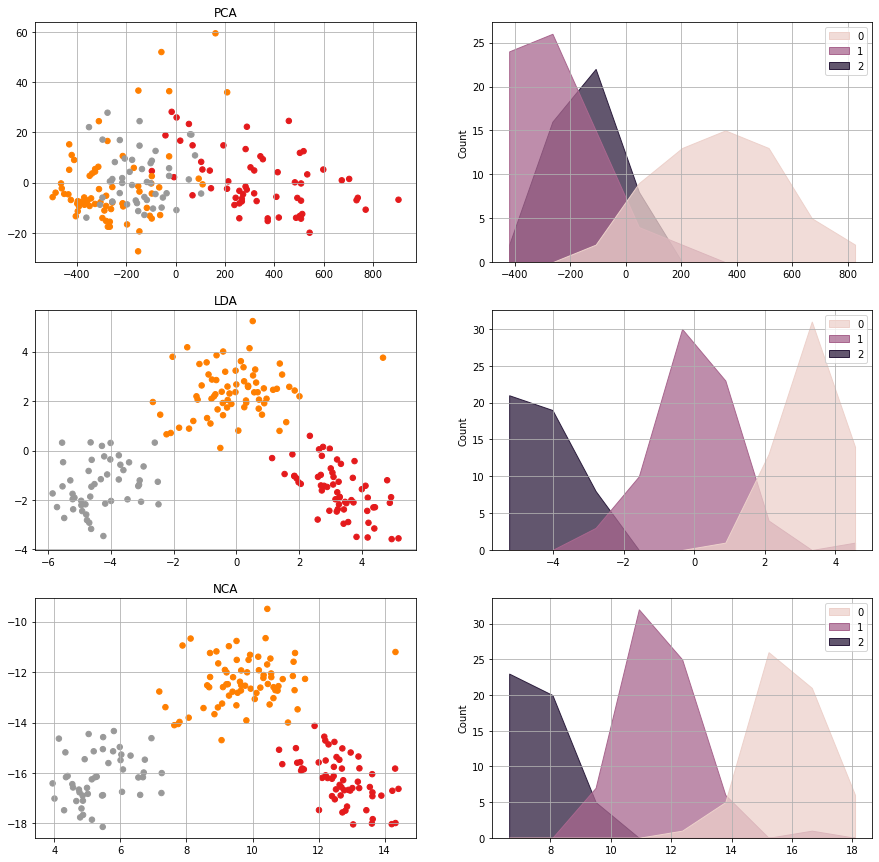

In [4]:
#Возьмем данные из датасета по вину
X, y = datasets.load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

#Применим РСА на 1 компаненту и Применим РСА на 1 компаненту
pca1 = PCA(n_components=1)
pca2 = PCA(n_components=2)


#LDA Для одной компаненты и для 2
lda1 = LinearDiscriminantAnalysis(n_components=1)
lda2 = LinearDiscriminantAnalysis(n_components=2)

# Аналогично для NCA
nca1 = NeighborhoodComponentsAnalysis(n_components=1)
nca2 = NeighborhoodComponentsAnalysis(n_components=2)

dim_reduction_methods = [('PCA', pca1, pca2), ('LDA', lda1, lda2), ('NCA', nca1, nca2)]

figure, axa = plt.subplots(3,2, figsize=(15,15))
   
#Отобразим их на графиках    
    
for i, (name, model1, model2) in enumerate(dim_reduction_methods):
    
    model1.fit(X_train, y_train)
    model2.fit(X_train, y_train)

    X_tr1 = model1.transform(X)
    X_tr2 = model2.transform(X)

    axa[i,0].scatter(X_tr2[:, 0], X_tr2[:, 1], c=y, s=30, cmap='Set1')
    sns.histplot(x=list(X_tr1.reshape(1,-1)[0]), hue=y, ax=axa[i,1], element="poly")
    axa[i,0].set_title(f"{name}")
    axa[i,0].grid()
    axa[i,1].grid()

plt.show()

#У нас очень большое кол-во признаков, которые характеризуют вино. У нас есть всего 3 класса вина
#Мы видим, что РСА сжала признаковое простарнство  в размерность из двух признаков, но отделиь классы очень сложно
#Когда мы сжимаем в одномерное простарнство (картинка справа), то видим, что 1 и 2 класс очень сильно наложен друг на друга


#LDA в двухмерном пространстве справился очень хорошо и разделил классы (это и цель его). Можем легко отделить их
#в одномерном пространстве не плохо, но есть небольшое наложение классов

#Для NCA как и для LDA все очень хорошо и сутация такая же 


  Автоматический отбор признаков

In [ ]:
# Метод обертки, про который мы говорили ранее в лекции

In [5]:
knn = KNeighborsClassifier(n_neighbors=3)
#Создаем классфикатор, с помощью которого будет делаться отбор 
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
# SequentialFeatureSelector делает всю работу, отбор признаков
#Передаем модель, с помощью которой будут отбираться признаки  knn
# и кол-во отобранных признаков n_features_to_select

sfs.fit(X, y) #отправляем данные для обучения 

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=3)

In [ ]:
sfs.get_support()
# можем посмотреть, что предлагает взять нам для работы
# Из того признакового пространства, которое там было, он предлаегает нам взять 1 признак и еще 2
#Они являются самыми хорошими для решения данной задачи

array([ True, False, False, False, False, False,  True, False, False,
        True, False, False, False])

In [ ]:
sfs.transform(X).shape
# Можем преобразовать наше признаковое пространство в новое
#то есть он отберет нужные признаки

(178, 3)

In [8]:
#другой метод
#он хорош тем, что имеет дополнительное требование к нашей модели, должен быть метод коэф, который показыает коэффициенты
#В качестве модели для вычисления возьмем метод на основе опорных векторов

from sklearn.feature_selection import v
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=3, step=1)
# RFE Создаем объект, который будет отбирать наши признаки 
#estimator передаем туда нашу модель 
#n_features_to_select кол-во признаков, которые нужно отобрать 
#step кол-во шагов, которые нам нужно сделать, чтобы эти признаки отобрать 

selector = selector.fit(X, y)



In [9]:
selector.support_
#отбираются наши признаки и показывает, какие нужно взять. Они уже отличаются от тех, что были ранее

array([False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False])

In [ ]:
selector.ranking_
#Возращает ранг признаков, какие брать, а какие нет


array([ 3,  8,  5,  6, 10,  4,  1,  1,  9,  7,  1,  2, 11])

In [ ]:
#У нас совпал только 1 признак. Можем сказать, что для разных методов отбора признаков у нас есть 1 признак,
#который важный для любого метода 